# Семинар 3. Перцептрон и неглубокие нейронные сети
**Внимание!** В этом семинаре для содержательной части кода разрешается использовать только библиотеку `numpy`. Решения с использованием других библиотек не будут засчитаны.


## Задача 3.1 [max = 10 баллов]

Дополните классы функций активаций `Sigmoid` и `ReLU` при помощи инструментов библиотеки `numpy`, следуя предложенному ниже шаблону. Напомним, что:
$$
\sigma(x) = \frac{1}{1+\exp(-x)};
\quad
\operatorname{ReLU}(x)=
\begin{cases}
  x,~x\geq 0,\\
  0,~x<0.
\end{cases}
$$

[1 балл] Установите аналитически область значений каждой из функций

[1 балл] Вычислите аналитически производные обеих функций

[1 балл] Покажите аналитически, что
$$
\frac{\rm d}{{\rm d}x}\sigma(x) = \sigma(x) \cdot \left[1-\sigma(x)\right]
$$

[1 балл] Установите аналитически область значений производной каждой из функций

[1 балл] Определите у обоих классов метод `__call__(self, x)`, который принимает числовой `numpy` массив произвольного размера и возвращает числовой `numpy` массив того же размера, заполненный значениями функции активации в соответствующих точках

[1 балл]  Определите у обоих классов метод `derivative(self, x)`, который принимает числовой `numpy` массив произвольного размера и возвращает числовой `numpy` массив того же размера, заполненный значениями производной функции активации в соответствующих точках.$^*$ **Внимание:** данный пункт не оценивается, если не получена аналитическая формула для производных!

[1 балл] Полностью векторизуйте решение (избегайте явного использования циклов и условных операторов)

[1 балл] Предусмотрите обработку некорректных входных данных

[1 балл] При помощи метода `__call__` изобразите в одних осях графики обеих функций активации на отрезке $x\in[-3,\,3]$. Подпишите оси и линии, выберите разумный диапазон значений по вертикальной оси

[1 балл] При помощи метода `derivative` изобразите в одних осях графики производных от обеих функций активации на отрезке $x\in[-3,\,3]$. Подпишите оси и линии, выберите разумный диапазон значений по вертикальной оси. **Внимание:** данный пункт не оценивается, если не получена аналитическая формула для производных!

```python
import numpy as np

class Sigmoid:
    def __init__(self):
        pass

    def __call__(self, x:np.ndarray)->np.ndarray:
        # TO-DO

    def derivative(self, x:np.ndarray)->np.ndarray:
        # TO-DO


class ReLU:
    def __init__(self):
        pass

    def __call__(self, x:np.ndarray)->np.ndarray:
        # TO-DO

    def derivative(self, x:np.ndarray)->np.ndarray:
        # TO-DO
```

---
$^*$Строго говоря, одна из функций активации (какая?) терпит разрыв производной в некоторой точке (в какой?). Для программной реализации доопределите значение производной в этой точке лево- или правосторонним пределом, на ваш выбор


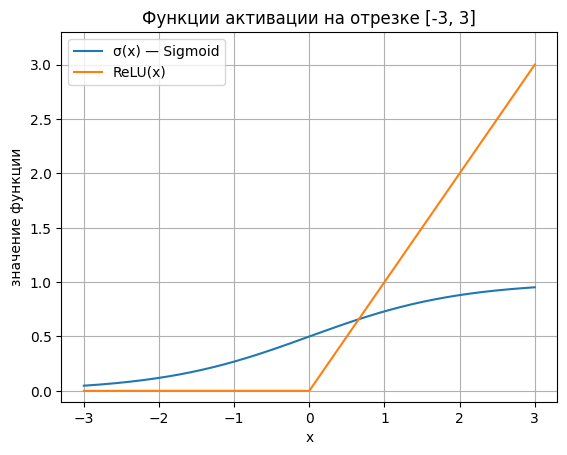

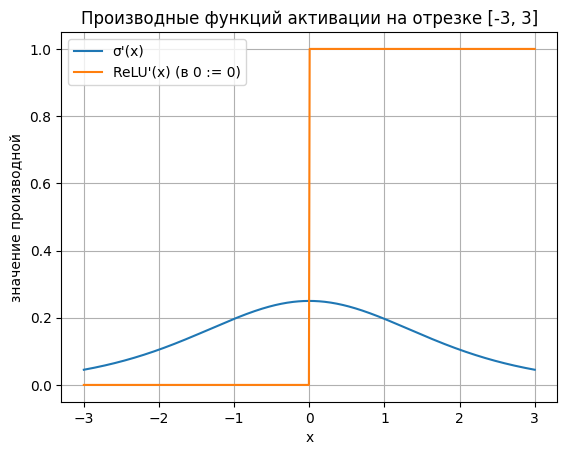

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class Sigmoid:
    def __init__(self):
        pass

    def __call__(self, x: np.ndarray) -> np.ndarray:
        if not isinstance(x, np.ndarray):
            raise TypeError("Input must be a numpy array")
        return 1 / (1 + np.exp(-x))

    def derivative(self, x: np.ndarray) -> np.ndarray:
        if not isinstance(x, np.ndarray):
            raise TypeError("Input must be a numpy array")
        s = self.__call__(x)
        return s * (1 - s)


class ReLU:
    def __init__(self):
        pass

    def __call__(self, x: np.ndarray) -> np.ndarray:
        if not isinstance(x, np.ndarray):
            raise TypeError("Input must be a numpy array")
        return np.maximum(0, x)

    def derivative(self, x: np.ndarray) -> np.ndarray:
        if not isinstance(x, np.ndarray):
            raise TypeError("Input must be a numpy array")
        # Правосторонний предел в 0 → 1
        grad = np.where(x > 0, 1, 0)
        grad = np.where(x == 0, 1, grad)
        return grad


sigmoid = Sigmoid()
relu = ReLU()

x = np.linspace(-3, 3, 600)
y_sig = sigmoid(x)
y_relu = relu(x)

plt.figure()
plt.plot(x, y_sig, label="σ(x) — Sigmoid")
plt.plot(x, y_relu, label="ReLU(x)")
plt.xlabel("x")
plt.ylabel("значение функции")
plt.ylim(-0.1, 3.3)
plt.title("Функции активации на отрезке [-3, 3]")
plt.legend()
plt.grid(True)
plt.show()

# Значения производных
dy_sig = sigmoid.derivative(x)
dy_relu = relu.derivative(x)

plt.figure()
plt.plot(x, dy_sig, label="σ'(x)")
plt.plot(x, dy_relu, label="ReLU'(x) (в 0 := 0)")
plt.xlabel("x")
plt.ylabel("значение производной")
plt.ylim(-0.05, 1.05)
plt.title("Производные функций активации на отрезке [-3, 3]")
plt.legend()
plt.grid(True)
plt.show()

## Задача 3.2 [max = 10 баллов]

Дополните шаблон класса `Perceptron`, предложенный ниже. Напомним, что модель перцептрона определяется следующим уравнением:
$$
F(X)_{i} = a\left(\sum_{j=1}^d X_{ij}w_{j}+b\right),
$$
где $a(\cdot)$ — функция активации, $w_{j}$ и $b$ — параметры, индекс $i$ нумерует наблюдения в датасете, индекс $j$ — столбцы-признаки $X$.

[1 балл] Вычислите аналитически производную $F$ по параметрам $w_{j}$ и $b$

[2 балла] Дополните метод `__init__(self, input_size, activation, random_seed)`. Реализуйте инициализацию параметров модели случайным образом (например, из стандартного нормального или равномерного распределения). Предусмотрите возможность воспроизводимой случайной генерации при помощи аргумента `random_seed`

[4 балла] Дополните методы `forward(self, X)` и `backward(self, X)`, которые принимают на вход матрицу признаков `X` и возвращают выходные значения перцептрона и матрицу производных перцептрона по параметрам $w_{j}$ и $b$, соответственно. Обратите внимание на требуемые типы данных и требуемый размер выхода (указаны в docstring). Считайте, что у объекта `activation` должны быть определены методы `__call__` и `derivative`. В случае, когда при инициализации класса указано `activation=None`, считайте, что функция активации не используется, и перцептрон работает как обычная линейная модель. **Внимание:** если не получена аналитическая формула для производной $F$, то метод `backward(self, X)` не оценивается!

[1 балл] Полностью векторизуйте решение (избегайте явного использования циклов и условных операторов)

[2 балла] Предусмотрите обработку некорректных входных данных в каждом из методов класса

```python
import numpy as np

class Perceptron:
    def __init__(self, input_size:int=1, activation=None, random_seed=None):

        assert isinstance(input_size, int)
        assert input_size > 0
        # TO-DO: добавьте дополнительные проверки

        self.input_size = input_size
        self.activation = activation
        # TO-DO: инициализируйте параметры нужного размера случайным образом

    def forward(self, X:np.ndarray)->np.ndarray:
        """
        Params
        ------
        X : np.ndarray of shape (n_samples, self.input_size)

        Returns
        -------
        np.ndarray of shape (n_samples,)
        """
        # TO-DO: проверьте корректность входных данных
        # TO-DO: вычислите и верните выходное значение перцептрона

    def backward(self, X:np.ndarray)->np.ndarray:
        """
        Params
        ------
        X : np.ndarray of shape (n_samples, self.input_size)

        Returns
        -------
        np.ndarray of shape (n_samples, self.input_size + 1)
        """
        # TO-DO: проверьте корректность входных данных
        # TO-DO: вычислите и верните градиент выходного значения по параметрам

```



In [14]:
class Perceptron:
    def __init__(self, input_size:int=1, activation=None, random_seed=None):
        if not isinstance(input_size, int) or input_size <= 0:
            raise ValueError("input_size must be positive int.")
        if activation is not None and not (hasattr(activation, "__call__") and hasattr(activation, "derivative")):
            raise TypeError("activation must have __call__ and derivative or be None.")
        if random_seed is not None and not isinstance(random_seed, (int, np.integer)):
            raise TypeError("random_seed must be int or None.")

        self.input_size = input_size
        self.activation = activation

        rng = np.random.default_rng(random_seed)
        self.w = rng.normal(size=(input_size,)).astype(np.float64)
        self.b = float(rng.normal())

    @staticmethod
    def _check_X(X, input_size):
        X = np.asarray(X)
        if X.ndim != 2 or X.shape[1] != input_size:
            raise ValueError("X must be (n_samples, input_size).")
        if X.dtype.kind not in "iufc":
            raise TypeError("X must be numeric.")
        return X.astype(np.float64, copy=False)

    def forward(self, X:np.ndarray)->np.ndarray:
        """
        X : (n_samples, input_size)
        return : (n_samples,)
        """
        X = self._check_X(X, self.input_size)
        z = X @ self.w + self.b
        return z if self.activation is None else self.activation(z)

    def backward(self, X:np.ndarray)->np.ndarray:
        """
        X : (n_samples, input_size)
        return : (n_samples, input_size + 1)
                 [ dF/dw_1 ... dF/dw_d  dF/db ]
        """
        X = self._check_X(X, self.input_size)
        z = X @ self.w + self.b
        a_prime = np.ones_like(z, dtype=np.float64) if self.activation is None \
                  else np.asarray(self.activation.derivative(z), dtype=np.float64)
        grad_w = a_prime[:, None] * X
        grad_b = a_prime[:, None]
        return np.concatenate([grad_w, grad_b], axis=1)



Используйте ячейки ниже для первичной проверки вашего кода.

Ошибки при их запуске свидетельствуют о том, что часть задания выполнена некорректно

In [15]:
n_samples = 10
input_size = 1000
X = np.random.normal(size=(n_samples, input_size))
X

array([[ 2.95436252, -0.0363262 , -0.08389159, ...,  1.75225876,
        -0.46630024, -0.73858034],
       [ 0.96289724, -0.52643819,  0.42757158, ..., -0.116789  ,
        -2.29582324, -0.43613242],
       [-0.77447336,  1.63016645,  0.10012872, ...,  1.18783709,
         0.71212176,  1.33925179],
       ...,
       [-0.68613205, -0.80464012,  1.68256918, ..., -0.66798729,
         0.06789349, -0.29047927],
       [ 1.34775078, -1.26392173, -0.38277663, ..., -0.9740478 ,
        -0.5761463 , -2.02420453],
       [ 1.81488309, -1.94037874,  0.99477292, ..., -0.63194259,
         0.1189499 ,  0.93434735]], shape=(10, 1000))

In [16]:
sigmoid = Sigmoid()
model = Perceptron(input_size=input_size, activation=sigmoid, random_seed=42)

In [17]:
output = model.forward(X)
assert isinstance(output, np.ndarray)
assert output.shape == (n_samples,)

In [18]:
grad = model.backward(X)
assert isinstance(grad, np.ndarray)
assert grad.shape == (n_samples, input_size + 1)

## Задача 3.3 [max = 20 баллов]

### 3.3.1 Реализация неглубокой нейронной сети [max = 10 баллов]

Дополните шаблон класса `ShallowNeuralNetwork`, предложенный ниже. Напомним, что модель неглубокой нейронной сети c $m$ скрытыми элементами и одним выходом  определяется следующими уравнениями:

$$
\begin{aligned}
&H_{il} = a\left(\sum_{j=1}^d X_{ij}w^{\rm i \rightarrow h}_{jl}+b^{\rm i \rightarrow h}_l\right),\quad l\in\{1,\,2\dots,\,m\};\\
&F(X)_{i} = \sum_{l=1}^m H_{il}w^{\rm h \rightarrow o}_l + b^{\rm h \rightarrow o},
\end{aligned}
$$
где $a(\cdot)$ — функция активации, $w^{\rm i \rightarrow h}_{jl}$, $b^{\rm i \rightarrow h}_l$, $w^{\rm h \rightarrow o}_l$ и $b^{\rm h \rightarrow o}$ — параметры, индекс $i$ нумерует наблюдения в датасете, индекс $j$ — столбцы-признаки $X$, индекс $l$ — скрытые элементы.


[2 балла] Вычислите аналитически производную $F$ по каждому из параметров

[2 балла] Дополните метод `__init__(self, input_size, activation, random_seed)`. Реализуйте инициализацию параметров модели случайным образом (например, из стандартного нормального или равномерного распределения). Предусмотрите возможность воспроизводимой случайной генерации при помощи аргумента `random_seed`

[3 балла] Дополните методы `forward(self, X)` и `backward(self, X)`, которые принимают на вход матрицу признаков `X` и возвращают выходные значения нейронной сети и кортеж из двух матриц производных нейронной сети по параметрам, соответственно. Обратите внимание на требуемые типы данных и требуемый размер выхода (указаны в docstring). Считайте, что у объекта `activation` должны быть определены методы `__call__` и `derivative`. **Внимание:** если не получена аналитическая формула для производной $F$, то метод `backward(self, X)` не оценивается!

[1 балл] Полностью векторизуйте решение (избегайте явного использования циклов и условных операторов)

[2 балла] Предусмотрите обработку некорректных входных данных в каждом из методов класса



```python
import numpy as np

class ShallowNeuralNetwork:
    def __init__(self, input_size:int=1, hidden_size:int=1, activation=Sigmoid(), random_seed=None):

        assert isinstance(input_size, int)
        assert input_size > 0
        assert isinstance(hidden_size, int)
        assert hidden_size > 0
        # TO-DO: добавьте дополнительные проверки

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation
        # TO-DO: инициализируйте параметры нужного размера случайным образом


    def __call__(self, X:np.ndarray)->np.ndarray:
        return self.forward(X)

    def forward(self, X:np.ndarray)->np.ndarray:
        """
        Params
        ------
        X : np.ndarray of shape (n_samples, self.input_size)

        Returns
        -------
        np.ndarray of shape (n_samples,)
        """
        # TO-DO: проверьте корректность входных данных
        # TO-DO: вычислите и верните выходное значение

    def backward(self, X:np.ndarray)->tuple[np.ndarray, np.ndarray]:
        """
        Params
        ------
        X : np.ndarray of shape (n_samples, self.input_size)

        Returns
        -------
        tuple :
            np.ndarray of shape (n_samples, self.input_size + 1, self.hidden_size)
            np.ndarray of shape (n_samples, self.hidden_size + 1)
        """
        # TO-DO: проверьте корректность входных данных
        # TO-DO: вычислите и верните градиент выходного значения по параметрам

```


In [19]:
class ShallowNeuralNetwork:
    def __init__(self, input_size:int=1, hidden_size:int=1, activation=Sigmoid(), random_seed=None):
        if not (isinstance(input_size, int) and input_size > 0):
            raise ValueError("input_size must be positive int.")
        if not (isinstance(hidden_size, int) and hidden_size > 0):
            raise ValueError("hidden_size must be positive int.")
        if activation is not None and not (hasattr(activation, "__call__") and hasattr(activation, "derivative")):
            raise TypeError("activation must have __call__ and derivative or be None.")
        if random_seed is not None and not isinstance(random_seed, (int, np.integer)):
            raise TypeError("random_seed must be int or None.")

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation

        rng = np.random.default_rng(random_seed)
        self.W_ih = rng.normal(size=(input_size, hidden_size)).astype(np.float64)  # (d, m)
        self.b_h  = rng.normal(size=(hidden_size,)).astype(np.float64)             # (m,)
        self.w_ho = rng.normal(size=(hidden_size,)).astype(np.float64)             # (m,)
        self.b_o  = float(rng.normal())

    @staticmethod
    def _check_X(X, input_size):
        X = np.asarray(X)
        if X.ndim != 2 or X.shape[1] != input_size:
            raise ValueError("X must be (n_samples, input_size).")
        if X.dtype.kind not in "iufc":
            raise TypeError("X must be numeric.")
        return X.astype(np.float64, copy=False)

    def __call__(self, X):  # удобный синоним
        return self.forward(X)

    def forward(self, X:np.ndarray)->np.ndarray:
        """
        X : (n_samples, input_size)
        return : (n_samples,)
        """
        X = self._check_X(X, self.input_size)
        Z = X @ self.W_ih + self.b_h              # (n,m)
        H = Z if self.activation is None else np.asarray(self.activation(Z), dtype=np.float64)
        return H @ self.w_ho + self.b_o           # (n,)

    def backward(self, X:np.ndarray)->tuple[np.ndarray, np.ndarray]:
        """
        X : (n_samples, input_size)
        return :
          grads_ih : (n, input_size + 1, hidden_size)
            (для каждого l столбец: [dF/dW_ih_:,l ; dF/db_h_l])
          grads_ho : (n, hidden_size + 1)
            ([dF/dw_ho_1..m, dF/db_o])
        """
        X = self._check_X(X, self.input_size)
        Z = X @ self.W_ih + self.b_h
        if self.activation is None:
            H = Z
            a_prime = np.ones_like(Z)
        else:
            H = np.asarray(self.activation(Z), dtype=np.float64)
            a_prime = np.asarray(self.activation.derivative(Z), dtype=np.float64)

        n, d = X.shape
        m = self.hidden_size

        # верхний слой: dF/dw_ho = H ; dF/db_o = 1
        grads_ho = np.concatenate([H, np.ones((n,1), dtype=np.float64)], axis=1)  # (n, m+1)

        # нижний слой:
        # dF/dW_ih_jl = w_ho_l * a'(Z_il) * X_ij
        # dF/db_h_l   = w_ho_l * a'(Z_il)
        w = self.w_ho[None, None, :]                # (1,1,m)
        grad_W = w * a_prime[:, None, :] * X[:, :, None]   # (n,d,m)
        grad_bh = (self.w_ho * a_prime)[:, None, :]        # (n,1,m)
        grads_ih = np.concatenate([grad_W, grad_bh], axis=1)  # (n, d+1, m)

        return grads_ih, grads_ho

    def fit(self, X:np.ndarray, y:np.ndarray,
            learning_rate:float=1e-3, maxiter:int=-1, tolerance:float=1e-5, verbose:bool=True):
        # проверки
        X = self._check_X(X, self.input_size)
        y = np.asarray(y)
        if y.ndim != 1 or y.shape[0] != X.shape[0]:
            raise ValueError("y must be 1D and match n_samples.")
        if y.dtype.kind not in "iufc":
            raise TypeError("y must be numeric.")
        y = y.astype(np.float64, copy=False)
        if learning_rate <= 0: raise ValueError("learning_rate must be > 0.")
        if tolerance <= 0: raise ValueError("tolerance must be > 0.")
        if not isinstance(maxiter, int): raise TypeError("maxiter must be int.")

        n = X.shape[0]
        step = 0

        pred = self.forward(X)
        resid = pred - y
        loss = (resid @ resid) / n
        err  = float(np.max(np.abs(resid)))

        while err > tolerance:
            grads_ih, grads_ho = self.backward(X)
            coeff = (2.0 / n) * resid  # (n,)

            # верхний слой
            g_w_ho = np.sum(coeff[:, None] * grads_ho[:, :self.hidden_size], axis=0)  # (m,)
            g_b_o  = np.sum(coeff * grads_ho[:, -1])                                   # scalar
            # нижний слой
            g_W_ih = np.sum(coeff[:, None, None] * grads_ih[:, :self.input_size, :], axis=0)  # (d,m)
            g_b_h  = np.sum(coeff[:, None, None] * grads_ih[:, self.input_size:self.input_size+1, :], axis=0).ravel()

            # шаг GD
            self.W_ih -= learning_rate * g_W_ih
            self.b_h  -= learning_rate * g_b_h
            self.w_ho -= learning_rate * g_w_ho
            self.b_o  -= learning_rate * g_b_o

            step += 1
            pred  = self.forward(X)
            resid = pred - y
            loss  = (resid @ resid) / n
            err   = float(np.max(np.abs(resid)))

            if verbose:
                print(f"step: {step:4d}  loss: {loss:.4g}  error: {err:.4g}")

            if (step > maxiter > 0):
                break

        if verbose:
            print(f"training finished after {step} iterations, loss={loss:.4g}, error={err:.4g}")
        return self

Используйте ячейки ниже для первичной проверки вашего кода.

Ошибки при их запуске свидетельствуют о том, что часть задания выполнена некорректно

In [20]:
n_samples = 2
input_size = 1000
X = np.random.normal(size=(n_samples, input_size))

In [21]:
hidden_size = 8
sigmoid = Sigmoid()
model = ShallowNeuralNetwork(input_size=input_size, hidden_size=hidden_size, activation=sigmoid, random_seed=42)

In [22]:
output = model.forward(X)
assert isinstance(output, np.ndarray)
assert output.shape == (n_samples,)

In [23]:
grads = model.backward(X)

assert isinstance(grads, tuple)
assert len(grads) == 2

assert isinstance(grads[0], np.ndarray)
assert grads[0].shape == (n_samples, input_size + 1, hidden_size)

assert isinstance(grads[1], np.ndarray)
assert grads[1].shape == (n_samples, hidden_size + 1)

### 3.3.2 Проверка универсальной теоремы аппроксимации [max = 10 баллов]

**Важно:** приступайте к этому пункту только после того, как будут пройдены предложенные базовые тесты в пункте 3.3.1

Если тесты не пройдены, данный пункт не оценивается баллами

[4 балла] Дополните класс `ShallowNeuralNetwork`  методом `fit(self, X, y, learning_rate, maxiter, tolerance, metric)`, в котором реализуйте обучение методом градиентного спуска с функцией потерь MSE (среднеквадратичной ошибкой). Критерий остановки по величине метрики, который понадобится позже, уже реализован в шаблоне


```python
class ShallowNeuralNetwork:
# ...
    def fit(self,
            X:np.ndarray, y:np.ndarray,
            learning_rate:float=1.0e-5,
            maxiter:int=-1,
            tolerance:float=1.0e-5,
        ):
        # TO-DO: сделайте проверку корректности входных данных
        
        step = 0
        pred = # TO-DO: рассчитайте начальные выходы модели с использованием метода forward
        error = np.max(np.abs(y - pred))

        while error > tolerance:

            print("step: %d \t loss: %.3lg \t error: %.3lg" % (step, loss, error))

            # TO-DO: расчитайте градиент функции потерь по параметрам с использованием метода backward

            # TO-DO: обновите параметры модели с учетом рассчитанного выше градиента и коэффициента learning_rate

            step += 1
            pred = # TO-DO: рассчитайте новые выходы модели с использованием метода forward
            error = np.max(np.abs(y - pred))
            
            if (step > maxiter > 0):
                break

        print("training finished after %d iterations, loss=%.3lg and error=%.3lg achieved" % (step, loss, error))

        return self
```





In [24]:
# TO-DO

Используйте ячейки ниже для первичной проверки вашего кода.

Ошибки при их запуске свидетельствуют о том, что часть задания выполнена некорректно

In [25]:
n_samples = 2
input_size = 1000
X = np.random.normal(size=(n_samples, input_size))
y = np.random.normal(size=(n_samples,))

In [26]:
hidden_size = 8
relu = ReLU()
model = ShallowNeuralNetwork(input_size=input_size, hidden_size=hidden_size, activation=relu, random_seed=42)

In [27]:
model = model.fit(X, y, maxiter=50)

step:    1  loss: 1.743e+04  error: 186.7
step:    2  loss: 1.341  error: 1.292
step:    3  loss: 1.014  error: 1.009
step:    4  loss: 0.8158  error: 1.003
step:    5  loss: 0.694  error: 1.001
step:    6  loss: 0.6285  error: 0.9993
step:    7  loss: 0.6262  error: 0.9978
step:    8  loss: 0.6239  error: 0.9963
step:    9  loss: 0.6217  error: 0.9948
step:   10  loss: 0.6194  error: 0.9933
step:   11  loss: 0.6172  error: 0.9918
step:   12  loss: 0.615  error: 0.9903
step:   13  loss: 0.6128  error: 0.9888
step:   14  loss: 0.6106  error: 0.9873
step:   15  loss: 0.6084  error: 0.9858
step:   16  loss: 0.6062  error: 0.9844
step:   17  loss: 0.604  error: 0.9829
step:   18  loss: 0.6018  error: 0.9814
step:   19  loss: 0.5996  error: 0.9799
step:   20  loss: 0.5975  error: 0.9785
step:   21  loss: 0.5953  error: 0.977
step:   22  loss: 0.5932  error: 0.9755
step:   23  loss: 0.5911  error: 0.9741
step:   24  loss: 0.589  error: 0.9726
step:   25  loss: 0.5868  error: 0.9712
step:   2

[6 баллов] Обучите вашу модель аппроксимировать с заданной точностью $\varepsilon > 0$ следующие две функции на отрезке $x\in[0, 1]$:

$$f(x) = \left|\frac{2x-1}{2x+1}\right|+\frac{\sin(10\pi x)}{10}$$


$$g(x) = \sum_{n=0}^{3}0.5^{n}\cos(7^{n}\pi x)$$

Для этого:
- изобразите графики этих функций и исходя из визуального анализа оцените число точек, которое надо сгенерировать для адекватной оценки точности; сгенерируйте датасеты соответствующего размера (без шума!)
- реализуйте алгоритм поиска минимального числа скрытых слоёв $m$, необходимого для достижения заданной точности $\varepsilon$ в задаче аппроксимации этих функций на отрезке вашей моделью `ShallowNeuralNetwork` с функцией активации $\operatorname{ReLU}$ (под точностью здесь понимается то же, что и под параметром `tolerance` в методе `fit`)
- пользуясь вашим алгоритмом, изобразите на одном графике зависимость $\log_{10}(m)$ от $\log_{10}(\varepsilon)$ для обеих задач аппроксимации и для не менее чем 10 различных значений $\varepsilon$, охватывающих не менее чем 3 порядка величины

In [ ]:
def f_func(x):
    x = np.asarray(x, dtype=np.float64)
    return np.abs((2*x - 1) / (2*x + 1)) + np.sin(10*np.pi*x)/10.0

def g_func(x, N=30):
    x = np.asarray(x, dtype=np.float64)
    s = np.zeros_like(x)
    for n in range(N+1):
        s += (0.5**n) * np.cos((7**n) * np.pi * x)
    return s

def make_data(func, n_points=512):
    X = np.linspace(0.0, 1.0, n_points)
    y = func(X)
    return X.reshape(-1,1), y

def minimal_m_for_epsilon(func, eps,
                          m_candidates=(1,2,4,8,16,32,64,128),
                          learning_rate=2e-3, maxiter=800, n_points=512, seed=0, verbose=False):
    X, y = make_data(func, n_points=n_points)
    for m in m_candidates:
        model = ShallowNeuralNetwork(input_size=1, hidden_size=m, activation=ReLU(), random_seed=seed)
        model.fit(X, y, learning_rate=learning_rate, maxiter=maxiter, tolerance=eps, verbose=False)
        pred = model.forward(X)
        err = float(np.max(np.abs(y - pred)))
        if verbose:
            print(f"m={m}, err={err:.4g}")
        if err <= eps:
            return m, err
    return None, err  # не достигнуто

# Визуализация f и g
X_plot = np.linspace(0,1,1024)
plt.figure()
plt.plot(X_plot, f_func(X_plot), label="f(x)")
plt.plot(X_plot, g_func(X_plot), label="g(x)")
plt.xlabel("x"); plt.ylabel("value"); plt.title("f(x), g(x) на [0,1]")
plt.grid(True); plt.legend(); plt.show()

# Скан по eps: ≥10 точек и ≥3 порядка (например, 1e-1 ... 1e-4)
eps_vals = np.logspace(-1, -4, 12)
m_f, m_g = [], []
for eps in eps_vals:
    m1, _ = minimal_m_for_epsilon(f_func, eps, learning_rate=2e-3, maxiter=600, n_points=512, seed=42)
    m_f.append(np.nan if m1 is None else m1)
    m2, _ = minimal_m_for_epsilon(g_func, eps, learning_rate=2e-3, maxiter=600, n_points=512, seed=42)
    m_g.append(np.nan if m2 is None else m2)

# График log10(m) vs log10(ε) (пропускаем nan)
x = np.log10(eps_vals)
mf = np.array(m_f, dtype=float); mg = np.array(m_g, dtype=float)
plt.figure()
mask = ~np.isnan(mf); plt.plot(x[mask], np.log10(mf[mask]), marker="o", label="f(x)")
mask = ~np.isnan(mg); plt.plot(x[mask], np.log10(mg[mask]), marker="s", label="g(x)")
plt.xlabel("log10(ε)"); plt.ylabel("log10(m)")
plt.title("Минимальное число нейронов m для заданной точности ε")
plt.grid(True); plt.legend(); plt.show()

## Задача 3.4* [max = 10 дополнительных баллов]

[5 баллов] Для функции $f(x)$ создайте GIF-[анимацию](https://matplotlib.org/stable/users/explain/animations/animations.html), на которой изобразите статичный график график $f(x)$ и изменяющийся график предсказания обученной модели при различных $m$ на отрезке $x \in [0, 1]$. Не забудьте подписать оси и графики. На графике должны также отображаться текущая величина $m$ и величина $\varepsilon$.

[5 баллов] Для функции $f(x)$ создайте интерактивный виджет$^{**}$: повторите предыдущий пункт так, чтобы пользователь мог сам устанавливать количество слоёв $m$ в некотором диапазоне при помощи ползунка и получать на графике нужное изображение

---
$^{**}$В Google Colab возможны [проблемы](https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab) с интерактивными виджетами `matlplotlib`, рекомендуется либо делать виджет локально на своём компьютере, либо использовать другие библиотеки, например, `plotly`

In [29]:
def f_func(x):
    x = np.asarray(x, dtype=np.float64)
    return np.abs((2*x - 1) / (2*x + 1)) + np.sin(10*np.pi*x)/10.0

def g_func(x, N=30):
    x = np.asarray(x, dtype=np.float64)
    s = np.zeros_like(x)
    for n in range(N+1):
        s += (0.5**n) * np.cos((7**n) * np.pi * x)
    return s

def make_data(func, n_points=512):
    X = np.linspace(0.0, 1.0, n_points)
    y = func(X)
    return X.reshape(-1,1), y

def minimal_m_for_epsilon(func, eps,
                          m_candidates=(1,2,4,8,16,32,64,128),
                          learning_rate=2e-3, maxiter=800, n_points=512, seed=0, verbose=False):
    X, y = make_data(func, n_points=n_points)
    for m in m_candidates:
        model = ShallowNeuralNetwork(input_size=1, hidden_size=m, activation=ReLU(), random_seed=seed)
        model.fit(X, y, learning_rate=learning_rate, maxiter=maxiter, tolerance=eps, verbose=False)
        pred = model.forward(X)
        err = float(np.max(np.abs(y - pred)))
        if verbose:
            print(f"m={m}, err={err:.4g}")
        if err <= eps:
            return m, err
    return None, err  # не достигнуто

In [30]:
import imageio

def train_and_predict_on_grid(m, eps=1e-3, n_points=512, maxiter=1500, lr=2e-3, seed=0):
    X, y = make_data(f_func, n_points=n_points)
    model = ShallowNeuralNetwork(input_size=1, hidden_size=m, activation=ReLU(), random_seed=seed)
    model.fit(X, y, learning_rate=lr, maxiter=maxiter, tolerance=eps, verbose=False)
    pred = model.forward(X)
    err = float(np.max(np.abs(y - pred)))
    return X.ravel(), y, pred, err

def make_f_animation(ms=(1,2,4,8,16,32,64), eps=1e-3, outfile="f_approx.gif", n_points=512):
    frames = []
    X = np.linspace(0,1,n_points)
    y_true = f_func(X)
    for m in ms:
        xg, yt, yp, err = train_and_predict_on_grid(m, eps=eps, n_points=n_points)
        fig, ax = plt.subplots()
        ax.plot(X, y_true, label="f(x)")
        ax.plot(xg, yp, label=f"NN, m={m}, ε≈{err:.2e}")
        ax.set_xlabel("x"); ax.set_ylabel("value")
        ax.set_title("Аппроксимация f(x) ReLU-сетью")
        ax.grid(True); ax.legend()
        fig.canvas.draw()
        # рендер в изображение
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(image)
        plt.close(fig)
    imageio.mimsave(outfile, frames, fps=2)
    print(f"GIF сохранён: {outfile}")

# Пример:
# make_f_animation(ms=(1,2,4,8,16), eps=5e-3, outfile="f_demo.gif", n_points=512)


In [ ]:
from ipywidgets import interact, IntSlider, FloatLogSlider

def _interactive_view(m=4, eps=1e-3, n_points=512, lr=2e-3, maxiter=1200):
    X = np.linspace(0,1,n_points)
    y = f_func(X)
    model = ShallowNeuralNetwork(input_size=1, hidden_size=m, activation=ReLU(), random_seed=0)
    model.fit(X.reshape(-1,1), y, learning_rate=lr, maxiter=maxiter, tolerance=eps, verbose=False)
    y_hat = model.forward(X.reshape(-1,1))
    err = float(np.max(np.abs(y - y_hat)))

    plt.figure()
    plt.plot(X, y, label="f(x)")
    plt.plot(X, y_hat, label=f"NN (m={m}), err={err:.2e}")
    plt.xlabel("x"); plt.ylabel("value")
    plt.title("Интерактивная аппроксимация f(x)")
    plt.grid(True); plt.legend(); plt.show()

interact(_interactive_view,
         m=IntSlider(min=1, max=64, step=1, value=8, description="m"),
         eps=FloatLogSlider(base=10, min=-4, max=-1, step=0.1, value=1e-3, description="ε"),
         n_points=IntSlider(min=64, max=1024, step=64, value=512, description="N"),
         lr=FloatLogSlider(base=10, min=-4, max=-2, step=0.1, value=2e-3, description="lr"),
         maxiter=IntSlider(min=100, max=3000, step=100, value=1200, description="maxiter"));


interactive(children=(IntSlider(value=8, description='m', max=64, min=1), FloatLogSlider(value=0.001, descript…